Write a python code to find a linear transformation  y=Ax
  such that  y
  are uncorrelated (or independent), and plot the data after transformation.

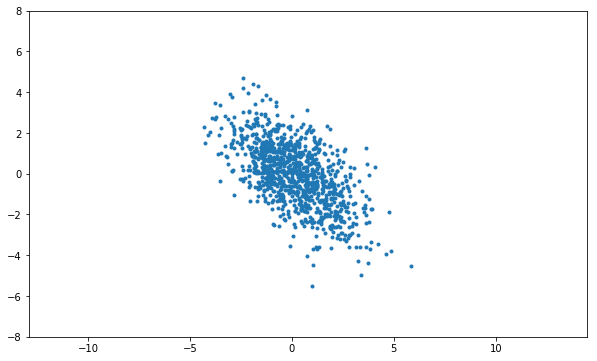

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu = np.array([0, 0])
sigma = 1./2.*np.array([[5, -3], [-3, 5]])

m = 1000
x = np.random.multivariate_normal(mu, sigma, m)

plt.figure(figsize=(10,6))
plt.plot(x[:,0], x[:,1], '.')
plt.axis('equal')
plt.ylim([-8,8])
plt.show()

In [ ]:
#covariance matrix의 eigenvector 구하면 그게 independent elipse의 basis임. 

[4.01195661 1.010308  ]
[[ 0.73701194  0.67587972]
 [-0.67587972  0.73701194]]


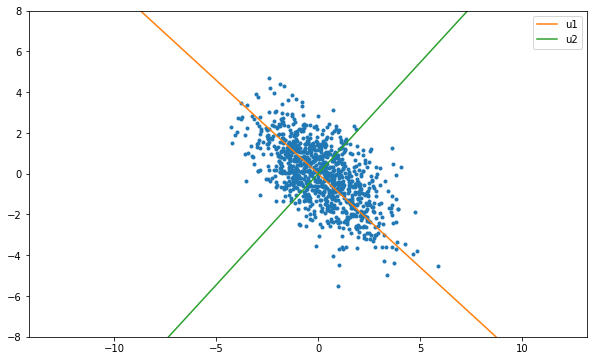

In [3]:
X = np.asmatrix(x)

S = 1/(m-1)*X.T*X
S = np.asmatrix(S)
 
D, U = np.linalg.eig(S)

idx = np.argsort(-D)
D = D[idx]
U = U[:,idx]

print(D)
print(U)

xp = np.arange(-10, 10)

plt.figure(figsize=(10,6))
plt.plot(X[:,0],X[:,1],'.')
plt.plot(xp, U[1,0]/U[0,0]*xp, label='u1')
plt.plot(xp, U[1,1]/U[0,1]*xp, label='u2')
plt.axis('equal')
plt.ylim([-8, 8])
plt.legend()
plt.show()

In [ ]:
#이를 활용해 X를 independent basis 축으로 이동 시킴
#이동 후 covariance matrix 구하면 basis 값을 알 수 있음

[4.01195661 1.010308  ]
[[1. 0.]
 [0. 1.]]


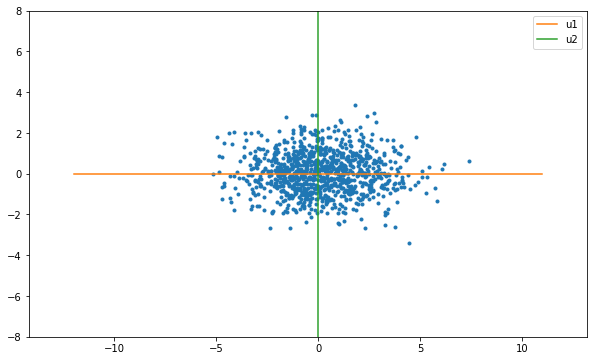

In [4]:
Y = X*U

Sy = 1/(m-1)*Y.T*Y
Sy = np.asmatrix(Sy)
 
Dy, Uy = np.linalg.eig(Sy)

idx = np.argsort(-Dy)
Dy = Dy[idx]
Uy = Uy[:,idx]

np.set_printoptions(suppress=True)
print(Dy)
print(Uy)

yp = np.arange(-12, 12)

plt.figure(figsize=(10,6))
plt.plot(Y[:,0],Y[:,1],'.')
plt.plot(yp, Uy[1,0]/Uy[0,0]*yp, label='u1')
plt.plot(yp, Uy[1,1]/Uy[0,1]*yp, label='u2')
plt.axis('equal')
plt.ylim([-8, 8])
plt.legend()
plt.show()